In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Temps.csv", parse_dates=["dt"])
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [ ]:
#data.to_pickle("data.pickle")

In [5]:
#verimin boyutu
data.shape

(239177, 7)

In [8]:
#icerisindeki kayip enformasyonum ne kadar?
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [10]:
#yudesel olarak kaybimi gormek istedigimde
data.isna().sum() / data.shape[0] * 100

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [11]:
#null degerleri silmek icin kullaniyoruz.
data.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [15]:
#null degerleri silmek icin kullaniyoruz. ve dataya kaydetmek icin kullaniyoruz.
data.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [ ]:
#eger datayı bozmadan sadece nullları temizleyerek devam etmek icin:
#data_prepared = data.dropna() diyerek devam edebiliriz.
#eger datadaki verileri koruyarak sadece nullları cikarmak ve dataya entegre calismasini istiyorsak.
#data.dropna(inplace=True) diyerek devam edebiliriz, onemli olan bir script uzerinde mi calisiyorsunuz yoksa bir notebookta bir daha calistirmayacak misiniz once buna karar vermeniz gerekli. 

In [17]:
data.shape

(228175, 7)

In [16]:
data_prepared = data.dropna(axis=0, how="any")

In [18]:
data_prepared.shape

(228175, 7)

In [20]:
data_prepared.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [22]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [29]:
#elimizde kac tane ulkenin verisi var.
data_prepared["Country"].value_counts().shape

(49,)

In [32]:
#turkeyideki verileri bulmak istedigimizde.
#data_prepared[data_prepared["Country"] == "Turkey"]
#iki farkli ulkeyi getirmek istiyorsak.
data_prepared[(data_prepared["Country"] == "Turkey") | (data_prepared["Country"] == "Brazil")]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [33]:
#ve & kullanimina bir filtreleme ornegi.
data_prepared[(data_prepared["Country"] == "Turkey") | (data_prepared["AverageTemperature"] >20)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239162,2012-07-01,24.646,1.750,Xian,China,34.56N,108.97E
239163,2012-08-01,23.885,0.435,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [44]:
data_selected = data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]

In [39]:
#ulkeleri getirip ve kac islem oldugunu goruyoruz.
#data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]["Country"].value_counts()

Brazil           12139
Turkey            9239
United States     8237
Name: Country, dtype: int64

In [45]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [46]:
#ulkelerin ortalama degerlerini bulmak icin:
data_selected.groupby(by="Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Turkey,13.790998,1.391654
United States,11.257246,1.200292


In [47]:
#ulkelerin max sicakligini bulmak icin:
data_selected.groupby(by="Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E
United States,2013-09-01,29.141,10.193,New York,42.59N,87.27W


In [48]:
#ayri ayri tablolarda yapmadan direk agg ile ortak tabloda gorebiliriz.
data_selected.groupby(by="Country").agg(["min", "mean", "max"])

C:\Users\fatih\AppData\Local\Temp\ipykernel_15304\549052032.py:2: FutureWarning: ['City', 'Latitude', 'Longitude'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_selected.groupby(by="Country").agg(["min", "mean", "max"])


dt                                           \
                     min                          mean        max   
Country                                                             
Brazil        1832-01-01 1928-01-08 06:28:51.345250816 2013-08-01   
Turkey        1743-11-01 1885-01-26 01:00:00.389652480 2013-08-01   
United States 1743-11-01 1894-08-21 01:56:57.312128512 2013-09-01   

              AverageTemperature                     \
                             min       mean     max   
Country                                               
Brazil                    13.536  22.847555  29.986   
Turkey                    -6.280  13.790998  29.845   
United States             -9.162  11.257246  29.141   

              AverageTemperatureUncertainty                    
                                        min      mean     max  
Country                                                        
Brazil                                0.040  0.877419   5.277  
Turkey                                0.062  1.391654   8.459  
United States                         0.075  1.200292  10.193

In [49]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [57]:
#turkiyede genelinde tarih ve sehirden bagimsiz ort sicaklari goster.
tr_avg_temps = data_selected[data_selected["Country"] == "Turkey"]["AverageTemperature"]
br_avg_temps = data_selected[data_selected["Country"] == "Brazil"]["AverageTemperature"]
usa_avg_temps = data_selected[data_selected["Country"] == "United States"]["AverageTemperature"]

C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='AverageTemperature', ylabel='Density'>

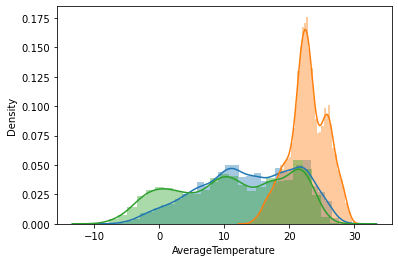

In [58]:
sns.distplot(tr_avg_temps)
sns.distplot(br_avg_temps)
sns.distplot(usa_avg_temps)
#bu yapilan islemler uzun yoldur, fazla veri cekmek istedigimiz bu yol cok saglikli olmayabilir.

In [60]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [62]:
data_selected["Country"].value_counts().index

Index(['Brazil', 'Turkey', 'United States'], dtype='object')

C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

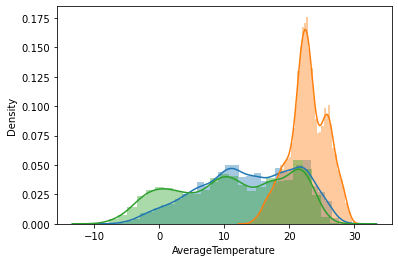

In [65]:
#bu yol saglikli ve kisa olmasi adina daha islevsel olarak gorulur.
ulkeler = data_selected["Country"].unique()
for ulke in ulkeler:
    data = data_selected[data_selected["Country"] == ulke]["AverageTemperature"]
    sns.distplot(data)

    

C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

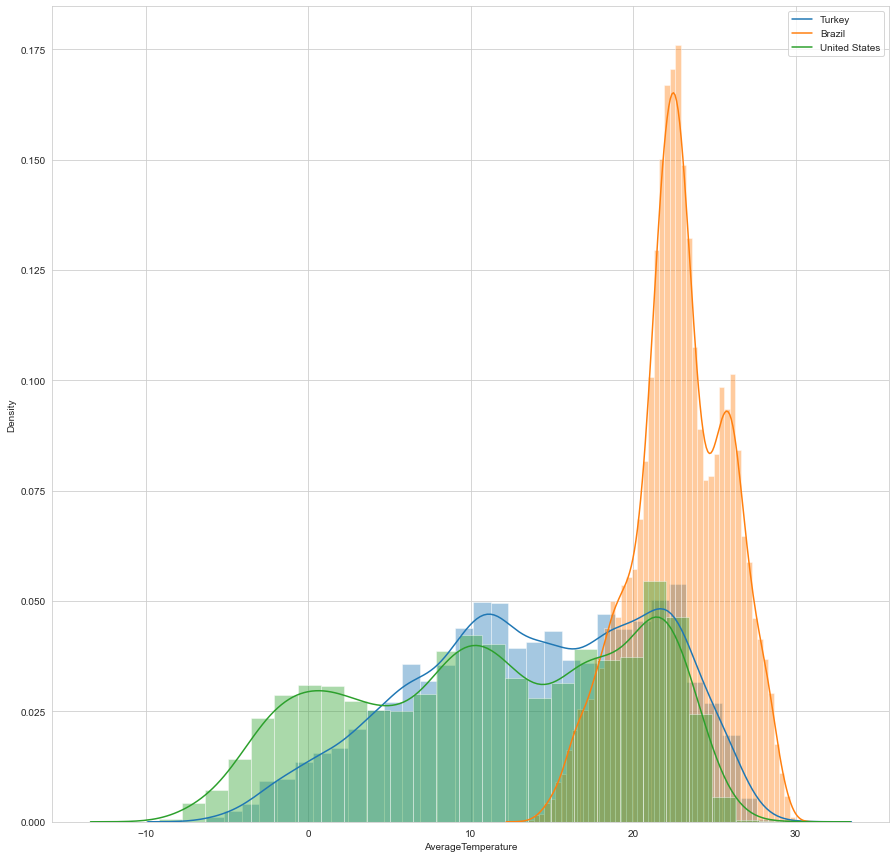

In [68]:
#bu grafigin uzerine biraz makyaj yapalim.
#stilini degistiyoruz ve boyutunu degistiriyoruz.
sns.set_style("whitegrid") # Girdileri bu sekilde ekleyebiliyoruz.
plt.figure(figsize=(15,15)) # boyutlar ile alakali isimleri de bu sekilde yapabiliyoruz.
ulkeler = data_selected["Country"].unique()
for ulke in ulkeler:
    data = data_selected[data_selected["Country"] == ulke]["AverageTemperature"]
    sns.distplot(data)
#hangi renk hangi ulkeyi gostedigini gormek icin.    
plt.legend(ulkeler) # hangi rengi hangi ulkeyi temsil ettigini bu sekilde gorebiliriz.

C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

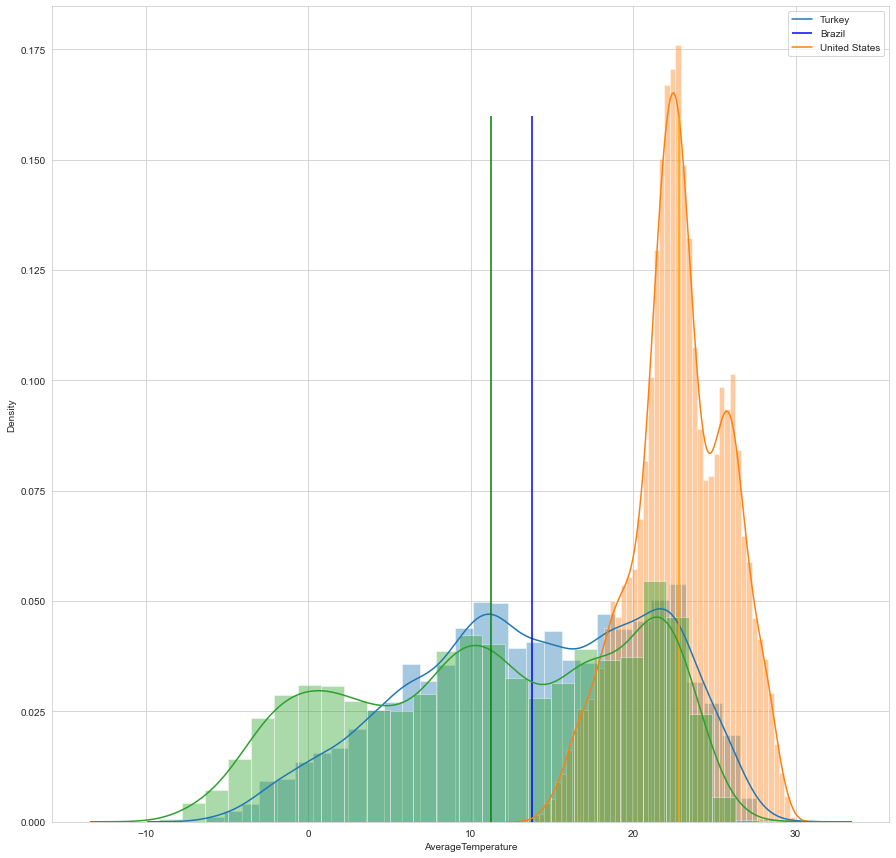

In [75]:
sns.set_style("whitegrid") # Girdileri bu sekilde ekleyebiliyoruz.
plt.figure(figsize=(15,15)) # boyutlar ile alakali isimleri de bu sekilde yapabiliyoruz.
colors = ["blue", "orange", "green"]

for color, ulke in zip(colors, ulkeler):
    sns.distplot(data_selected[data_selected["Country"] == ulke]["AverageTemperature"])
    ulke_mean = data_selected[data_selected["Country"] == ulke]["AverageTemperature"].mean()
    plt.vlines(ulke_mean, 0, 0.16, colors=color)
#hangi renk hangi ulkeyi gostedigini gormek icin.    
plt.legend(ulkeler) # hangi rengi hangi ulkeyi temsil ettigini bu sekilde gorebiliriz.

# Tam otomaktiklestirme


In [77]:
data_selected.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

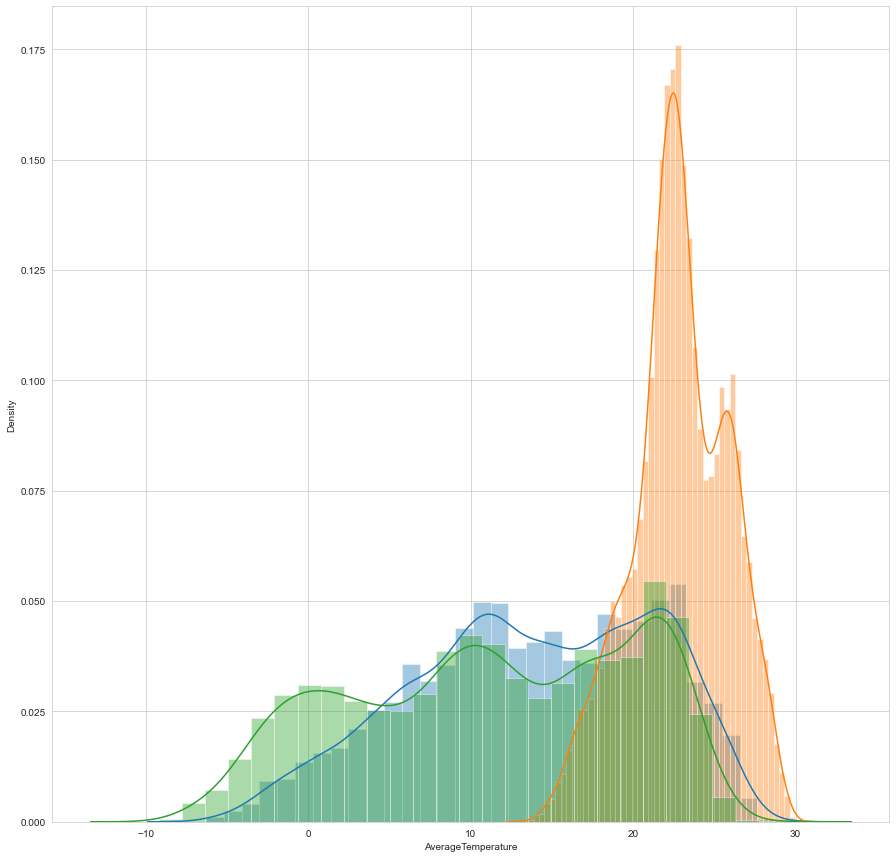

C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fatih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

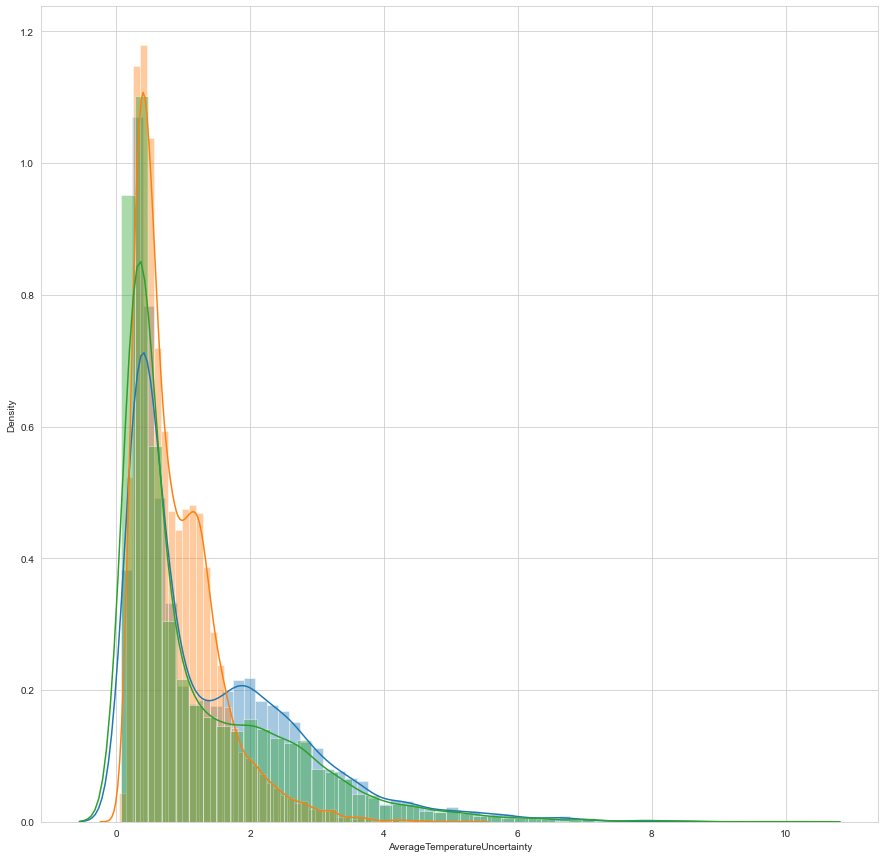

In [82]:
kolonlar = data_selected.columns[1:3]
ulkeler = data_selected["Country"].unique()

for kolon in kolonlar:
    plt.figure(figsize=(15,15))
    for ulke in ulkeler:
            sns.distplot(data_selected[data_selected["Country"] == ulke][kolon])
    plt.show()


scattterplot

In [83]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [86]:
tr_data = data_selected[(data_selected["Country"] == "Turkey") & (data_selected["dt"] > "01.01.1990")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
14714,1990-02-01,0.339,0.260,Ankara,Turkey,39.38N,33.29E
14715,1990-03-01,5.908,0.364,Ankara,Turkey,39.38N,33.29E
14716,1990-04-01,9.687,0.125,Ankara,Turkey,39.38N,33.29E
14717,1990-05-01,13.127,0.313,Ankara,Turkey,39.38N,33.29E
14718,1990-06-01,18.174,0.267,Ankara,Turkey,39.38N,33.29E


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

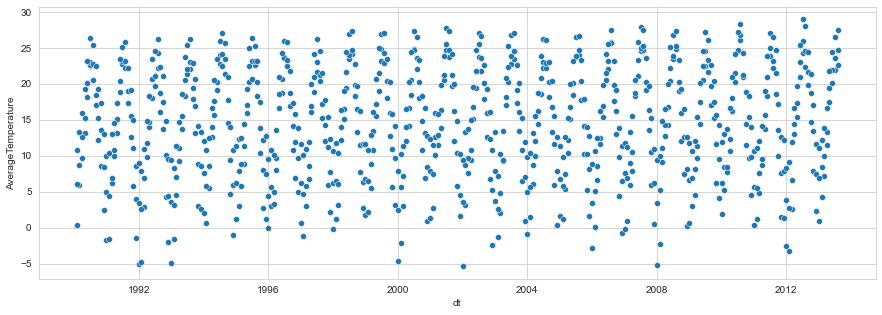

In [88]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

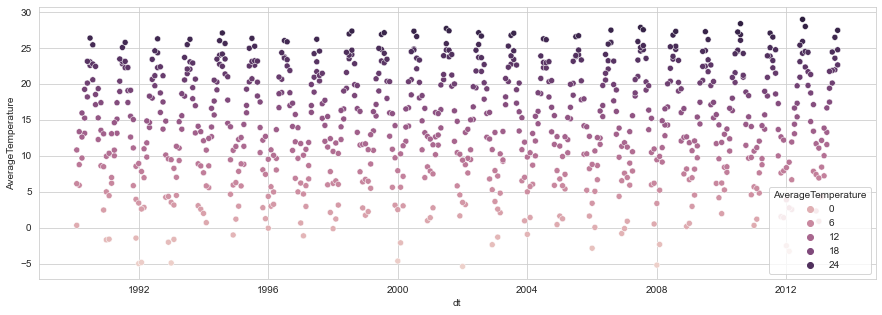

In [89]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data, hue="AverageTemperature")

In [92]:
tr_data["City"].value_counts()

Ankara      283
Istanbul    283
Izmir       283
Name: City, dtype: int64

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

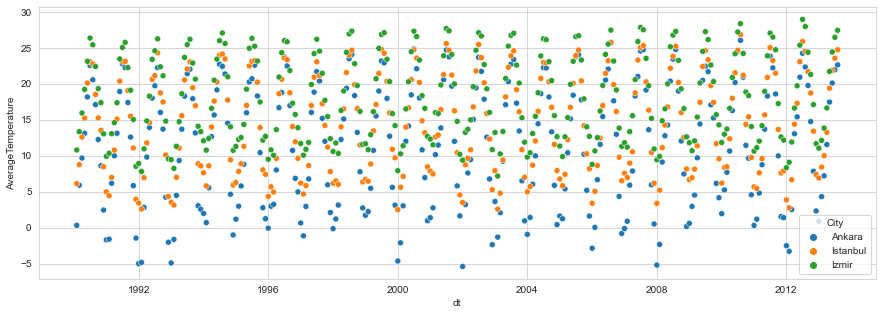

In [93]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data, hue="City")